# Predict to be Churned Clients

## Import Libraries

In [226]:
import pickle
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline

## Load Evaluation Dataset

In [255]:
# load the normalized test dataset
eval_data = pd.read_pickle('test_data_to_evaluate.pickle')
eval_data

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,...,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,does_churn,prob_of_churn
0,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.433117e+09,0.194465,0.104568,0.0,40.087205,0.0,0.0,NaN,NaN
1,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.422749e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0,NaN,NaN
2,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.443658e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0,NaN,NaN
3,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.425168e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0,NaN,NaN
4,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.441066e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48231,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.438387e+09,0.132824,0.000000,0.0,39.926855,0.0,0.0,NaN,NaN
48232,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.427846e+09,0.136859,0.000000,0.0,39.926856,0.0,0.0,NaN,NaN
48233,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.422749e+09,0.136859,0.000000,0.0,39.926856,0.0,0.0,NaN,NaN
48234,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.446336e+09,0.133453,0.000000,0.0,40.087205,0.0,0.0,NaN,NaN


In [256]:
# create a dataframe similar to the output template to use it later for storing the results
test_outputs = eval_data[['contract_id', 'does_churn', 'prob_of_churn']]
test_outputs

,contract_id,does_churn,prob_of_churn
0,710982830de1987358b8b4b6a61de5f9,NaN,NaN
1,710982830de1987358b8b4b6a61de5f9,NaN,NaN
2,710982830de1987358b8b4b6a61de5f9,NaN,NaN
3,710982830de1987358b8b4b6a61de5f9,NaN,NaN
4,710982830de1987358b8b4b6a61de5f9,NaN,NaN
...,...,...,...
48231,44e27783ba74e3c10aba49fae358fe0b,NaN,NaN
48232,44e27783ba74e3c10aba49fae358fe0b,NaN,NaN
48233,44e27783ba74e3c10aba49fae358fe0b,NaN,NaN
48234,44e27783ba74e3c10aba49fae358fe0b,NaN,NaN


## Evaluation Libraries

In [257]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [230]:
eval_data

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,...,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,does_churn,prob_of_churn
0,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.433117e+09,0.194465,0.104568,0.0,40.087205,0.0,0.0,NaN,NaN
1,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.422749e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0,NaN,NaN
2,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.443658e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0,NaN,NaN
3,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.425168e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0,NaN,NaN
4,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.441066e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48231,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.438387e+09,0.132824,0.000000,0.0,39.926855,0.0,0.0,NaN,NaN
48232,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.427846e+09,0.136859,0.000000,0.0,39.926856,0.0,0.0,NaN,NaN
48233,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.422749e+09,0.136859,0.000000,0.0,39.926856,0.0,0.0,NaN,NaN
48234,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.446336e+09,0.133453,0.000000,0.0,40.087205,0.0,0.0,NaN,NaN


## Normalize the Evaluation Data

In [259]:
# columns to normalize
X = eval_data.drop(labels=['does_churn','contract_id','prob_of_churn'],axis=1)
X.head()

,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,fcst_bill_meter_rent_12m,...,total_net_margin,customer_antiquity_in_years,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.07537,0.0,33.388612,...,242.880438,4.0,15.600595,1.433117e+09,0.194465,0.104568,0.0,40.087205,0.0,0.0
1,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.07537,0.0,33.388612,...,242.880438,4.0,15.600595,1.422749e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0
2,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.07537,0.0,33.388612,...,242.880438,4.0,15.600595,1.443658e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0
3,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.07537,0.0,33.388612,...,242.880438,4.0,15.600595,1.425168e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0
4,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.07537,0.0,33.388612,...,242.880438,4.0,15.600595,1.441066e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0


In [264]:
# normalization with MinMaxScaler()
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
clean_data = pd.DataFrame(d, columns=names)
clean_data.head(10)

,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,fcst_bill_meter_rent_12m,...,total_net_margin,customer_antiquity_in_years,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.452096,1.000000,0.777231,0.0,0.312231,0.002672,0.003719
1,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.092814,0.692146,0.552121,0.0,0.303794,0.002672,0.003719
2,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.817365,0.961342,0.772791,0.0,0.312231,0.002672,0.003719
3,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.176647,0.692146,0.552121,0.0,0.303794,0.002672,0.003719
4,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.727545,0.961342,0.772791,0.0,0.312231,0.002672,0.003719
5,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.910180,0.961342,0.772791,0.0,0.312231,0.002672,0.003719
6,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.541916,1.000000,0.777231,0.0,0.312231,0.002672,0.003719
7,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.359281,1.000000,0.777231,0.0,0.312231,0.002672,0.003719
8,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.000000,0.692146,0.552121,0.0,0.303794,0.002672,0.003719
9,0.044165,0.007661,0.087246,0.862483,0.126789,0.695936,0.657627,0.387793,0.0,0.227774,...,0.537037,0.25,0.160999,0.269461,1.000000,0.777231,0.0,0.312231,0.002672,0.003719


**Note:** clean_data is the dataframe with the normalized and with no outliers features of the evaluation dataset

## Load the trained model

In [265]:
model = pd.read_pickle('finalized_model.sav')
model

RandomForestClassifier()

## Distribution of the evaluation & training dataset

In [266]:
train_data_clean = pd.read_pickle('clean_data_after_training.pickle')

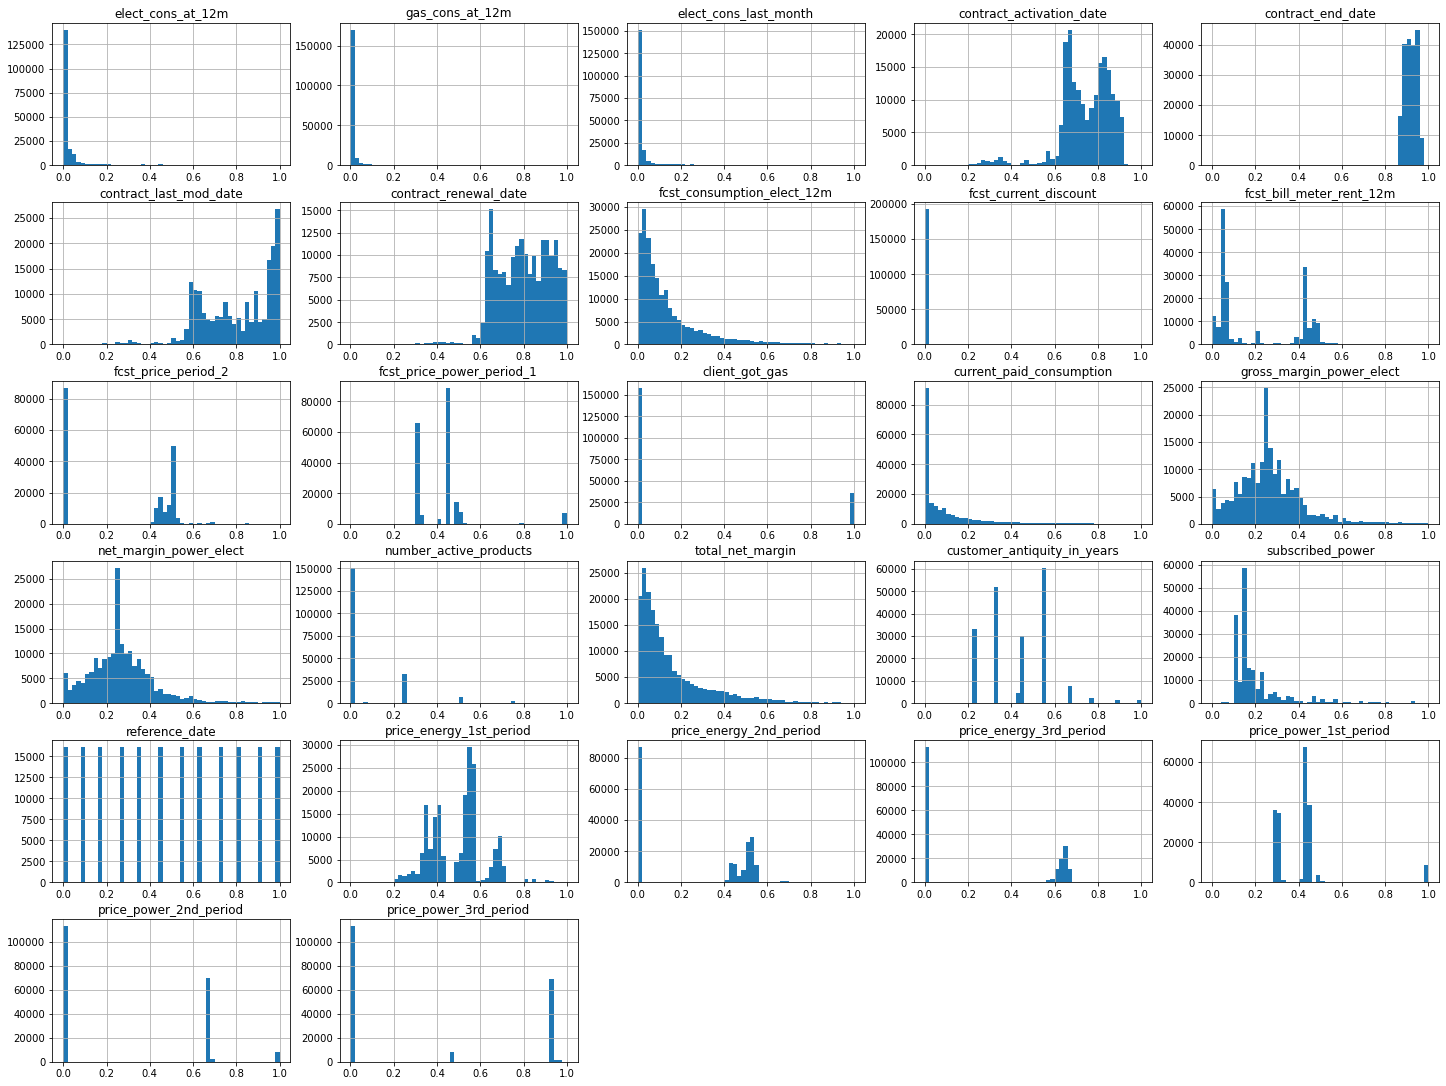

In [267]:
train_data_clean.hist(bins=50,figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

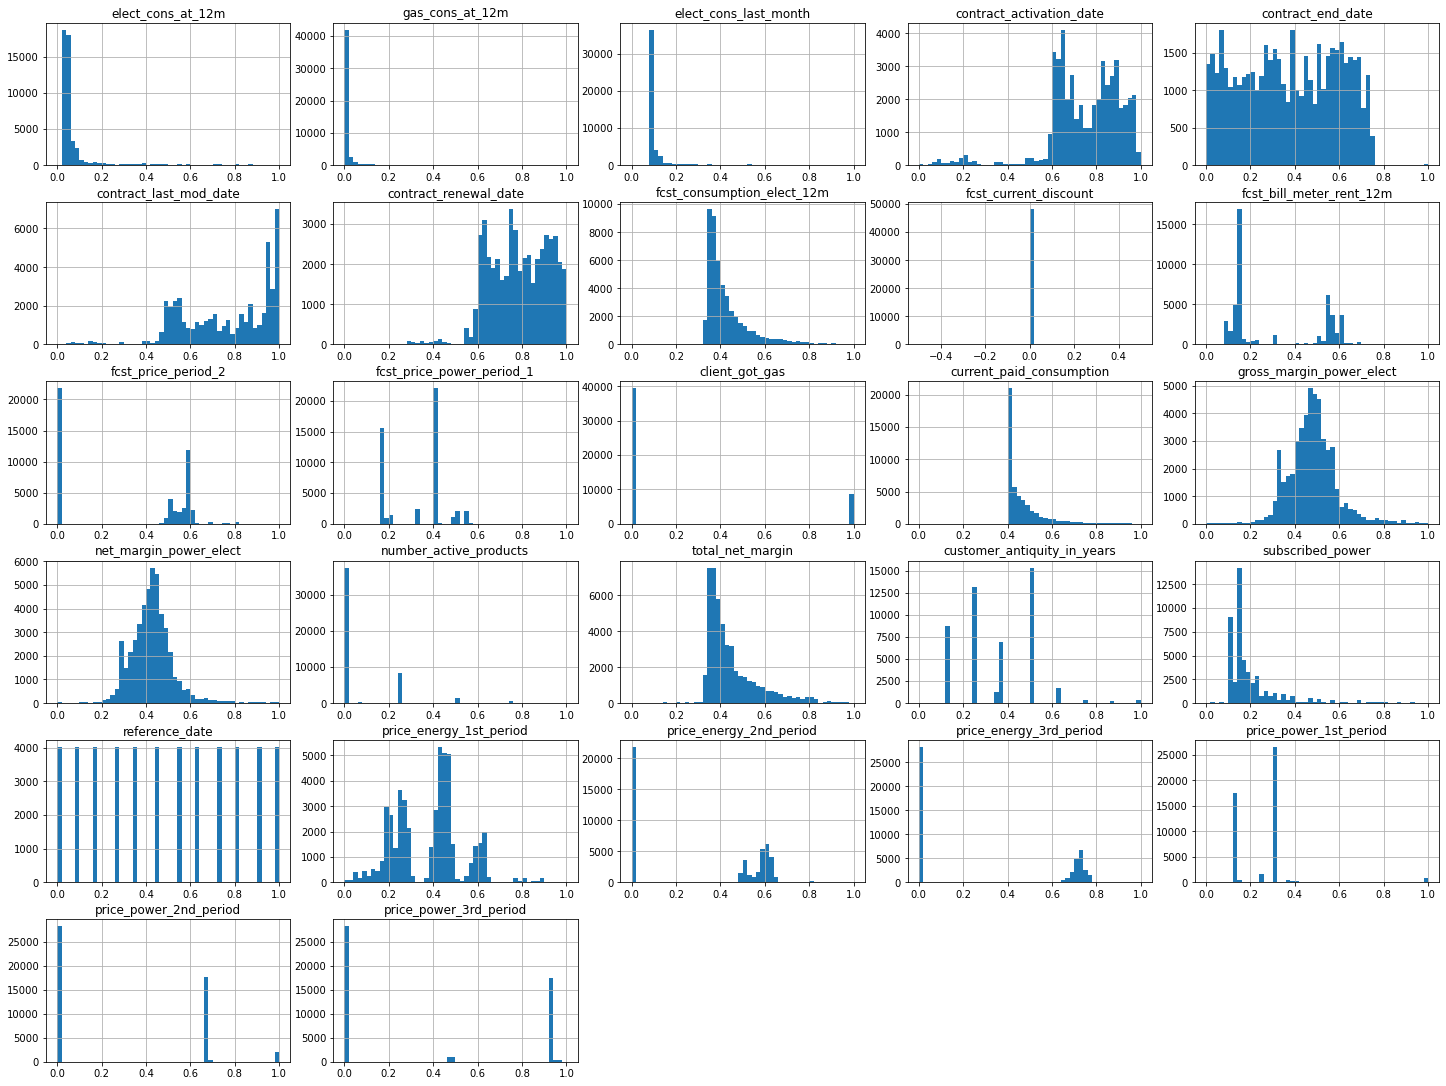

In [234]:
clean_data.hist(bins=50,figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

**Note:** We can notice that some of the most improtand features like:

- contract_end_date 
- fcst_consumption_elect_12m
- total_net_margin

Have some major differences on their distribution's range values

In [272]:
train_data_clean

,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,fcst_bill_meter_rent_12m,...,total_net_margin,customer_antiquity_in_years,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.176647,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
1,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.452096,0.531098,0.434405,0.000000,0.434964,0.000000,0.000000
2,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.359281,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
3,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.541916,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
4,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,1.000000,0.520408,0.000000,0.000000,0.441582,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.176647,0.404591,0.534917,0.641470,0.303250,0.669687,0.933174
192998,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.910180,0.313763,0.496590,0.614739,0.303250,0.669687,0.933174
192999,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.000000,0.404591,0.534917,0.641470,0.303250,0.669687,0.933174
193000,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.727545,0.352874,0.516678,0.646080,0.303250,0.669687,0.933174


In [235]:
# returns the prefiction  the model classifing the instances on churned or not
y_pred = model.predict(clean_data)
np.unique(y_pred)

array([0, 1], dtype=int64)

In [236]:
# returns the probability prefiction of the model for the 2 classes
y_pred_prob = model.predict_proba(clean_data)

# keep the probabilities for the positive class
score =  y_pred_prob[:,1]

In [237]:
np.unique(score)

array([0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16,
       0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27,
       0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38,
       0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49,
       0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59])

In [238]:
test_outputs['does_churn'] = y_pred.tolist()
test_outputs['prob_of_churn'] = score.tolist()

<ipython-input-238-9d5f79c52243>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_outputs['does_churn'] = y_pred.tolist()
<ipython-input-238-9d5f79c52243>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_outputs['prob_of_churn'] = score.tolist()


In [239]:
test_outputs

,contract_id,does_churn,prob_of_churn
0,710982830de1987358b8b4b6a61de5f9,0,0.35
1,710982830de1987358b8b4b6a61de5f9,0,0.29
2,710982830de1987358b8b4b6a61de5f9,0,0.35
3,710982830de1987358b8b4b6a61de5f9,0,0.29
4,710982830de1987358b8b4b6a61de5f9,0,0.35
...,...,...,...
48231,44e27783ba74e3c10aba49fae358fe0b,0,0.24
48232,44e27783ba74e3c10aba49fae358fe0b,0,0.25
48233,44e27783ba74e3c10aba49fae358fe0b,0,0.26
48234,44e27783ba74e3c10aba49fae358fe0b,0,0.25


In [240]:
test_outputs_ordered = test_outputs.sort_values(by="prob_of_churn",ascending=False)
test_outputs_ordered

,contract_id,does_churn,prob_of_churn
21315,f7ba0524967eb4420afd2e02e7296f55,1,0.59
18172,a8db469f67043ff63a0e55376e40c291,1,0.59
21312,f7ba0524967eb4420afd2e02e7296f55,1,0.59
21311,f7ba0524967eb4420afd2e02e7296f55,1,0.59
21309,f7ba0524967eb4420afd2e02e7296f55,1,0.59
...,...,...,...
16148,492fe3f9dff595aff1a97f572f290dbf,0,0.06
16149,492fe3f9dff595aff1a97f572f290dbf,0,0.06
16150,492fe3f9dff595aff1a97f572f290dbf,0,0.06
16151,492fe3f9dff595aff1a97f572f290dbf,0,0.06


<AxesSubplot:xlabel='does_churn', ylabel='count'>

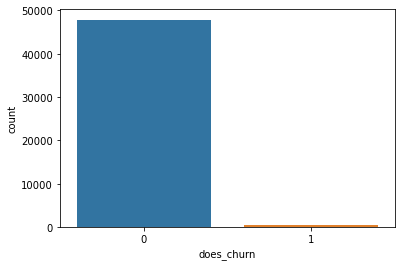

In [219]:
sns.countplot(x='does_churn',data=test_outputs)

In [220]:
count_not_churned = test_outputs['does_churn'].value_counts()[0]
count_churned = test_outputs['does_churn'].value_counts()[1]
print(f'{round(count_not_churned/len(test_outputs)*100,2)} % does not churn \n  {round(count_churned/len(test_outputs)*100,2)}% does churned ')

99.09 % has not churned 
  0.91% has churned 


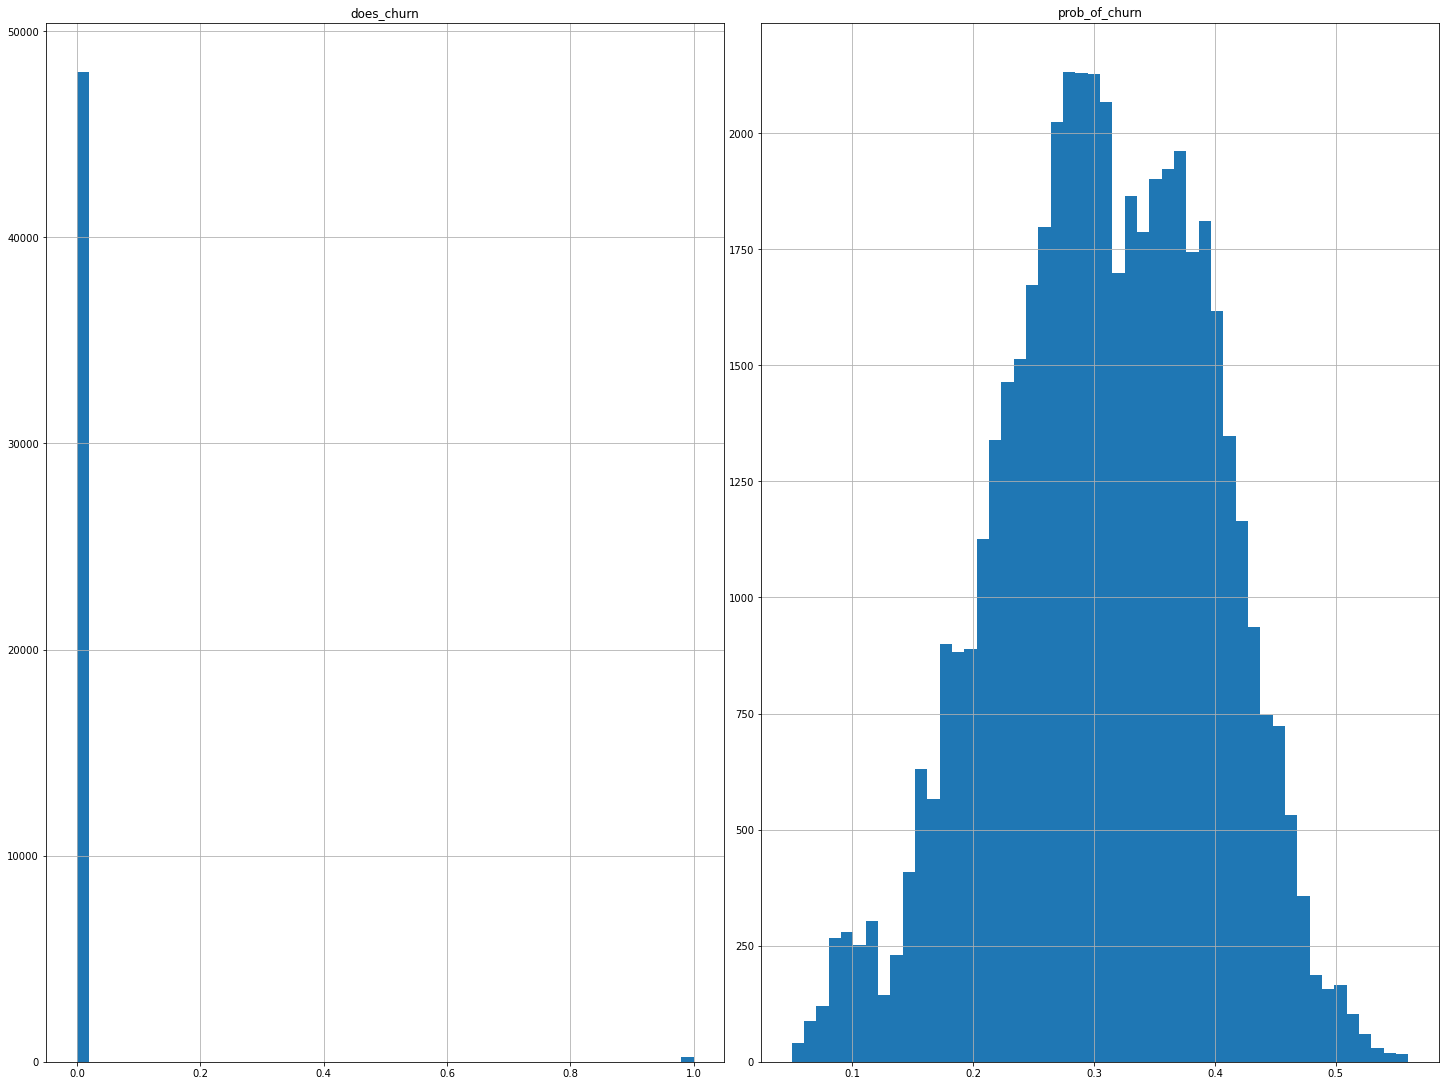

In [97]:
test_outputs.hist(bins=50,figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [241]:
# save my prediction to a csv file. Descending order
test_outputs_ordered.to_csv('test_outputs_predictions.csv', index = False)

## Discount Impact

In [242]:
test_outputs

,contract_id,does_churn,prob_of_churn
0,710982830de1987358b8b4b6a61de5f9,0,0.35
1,710982830de1987358b8b4b6a61de5f9,0,0.29
2,710982830de1987358b8b4b6a61de5f9,0,0.35
3,710982830de1987358b8b4b6a61de5f9,0,0.29
4,710982830de1987358b8b4b6a61de5f9,0,0.35
...,...,...,...
48231,44e27783ba74e3c10aba49fae358fe0b,0,0.24
48232,44e27783ba74e3c10aba49fae358fe0b,0,0.25
48233,44e27783ba74e3c10aba49fae358fe0b,0,0.26
48234,44e27783ba74e3c10aba49fae358fe0b,0,0.25


In [112]:
eval_data['fcst_consumption_elect_12m'] * eval_data['price_energy_1st_period'] + eval_data['fcst_bill_meter_rent_12m']

0        192.475352
1        165.215068
2        189.052191
3        165.215068
4        189.052191
            ...    
48231     33.136537
48232     33.721400
48233     33.721400
48234     33.227635
48235     33.721400
Length: 48236, dtype: float64

In [243]:
#pred_revenue_12m
test_outputs['revenue'] = eval_data['fcst_consumption_elect_12m'] * eval_data['price_energy_1st_period'] + eval_data['fcst_bill_meter_rent_12m']
#data_new = test_outputs[['churn','Predicted_Churn', 'Score', 'revenue']]

<ipython-input-243-6b329435124e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_outputs['revenue'] = eval_data['fcst_consumption_elect_12m'] * eval_data['price_energy_1st_period'] + eval_data['fcst_bill_meter_rent_12m']


In [244]:
test_outputs

,contract_id,does_churn,prob_of_churn,revenue
0,710982830de1987358b8b4b6a61de5f9,0,0.35,192.475352
1,710982830de1987358b8b4b6a61de5f9,0,0.29,165.215068
2,710982830de1987358b8b4b6a61de5f9,0,0.35,189.052191
3,710982830de1987358b8b4b6a61de5f9,0,0.29,165.215068
4,710982830de1987358b8b4b6a61de5f9,0,0.35,189.052191
...,...,...,...,...
48231,44e27783ba74e3c10aba49fae358fe0b,0,0.24,33.136537
48232,44e27783ba74e3c10aba49fae358fe0b,0,0.25,33.721400
48233,44e27783ba74e3c10aba49fae358fe0b,0,0.26,33.721400
48234,44e27783ba74e3c10aba49fae358fe0b,0,0.25,33.227635


In [245]:
test_outputs_to_churn = test_outputs[test_outputs['does_churn']==1]
test_outputs_to_churn

,contract_id,does_churn,prob_of_churn,revenue
1152,2a2ba7910bc7237612a088b5063a9e4d,1,0.52,391.815330
1153,2a2ba7910bc7237612a088b5063a9e4d,1,0.52,374.364670
1154,2a2ba7910bc7237612a088b5063a9e4d,1,0.52,391.815330
1155,2a2ba7910bc7237612a088b5063a9e4d,1,0.52,391.815330
1156,2a2ba7910bc7237612a088b5063a9e4d,1,0.52,396.256577
...,...,...,...,...
45904,73bc1b0dadd0af234f5d84a122f68384,1,0.51,123.439347
45905,73bc1b0dadd0af234f5d84a122f68384,1,0.51,122.539519
45906,73bc1b0dadd0af234f5d84a122f68384,1,0.51,122.539519
45907,73bc1b0dadd0af234f5d84a122f68384,1,0.51,122.539519


In [250]:
# offering to customers to churn 20% discoun
print("Percentage of revenue spent on discount strategy for churning customers: ",
      round(test_outputs_to_churn['revenue'].sum()*0.2/test_outputs['revenue'].sum(),10)*100)

Percentage of revenue spent on discount strategy for churning customers:  0.26167676


In [252]:
test_outputs['revenue'].sum()

11376277.684130114

In [253]:
test_outputs_to_churn['revenue'].sum()

148845.3764884926

In [254]:
test_outputs_to_churn['revenue'].sum() / test_outputs['revenue'].sum()

0.013083838195698371